<a href="https://colab.research.google.com/github/Dawoon-Jeong0523/Lecture_UNIST_2024_Fall/blob/main/Week12_Recurrent_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Networks

## Sequential Data and Recurrent Neural Networks (RNNs)

Many data sources are sequential in nature, requiring specialized approaches for building predictive models. Examples include:

- **Documents**: Examples include book and movie reviews, newspaper articles, and tweets. The sequence and relative positions of words in a document capture narrative, theme, and tone, which can be leveraged in tasks like topic classification, sentiment analysis, and language translation.
- **Time Series**: Examples include temperature, rainfall, wind speed, and air quality. These may be used to forecast weather several days ahead or predict climate changes over decades.
- **Financial Time Series**: Here, data might include market indices, trading volumes, stock and bond prices, and exchange rates. Although challenging, some indices can be predicted with reasonable accuracy.
- **Audio Recordings**: Examples include recorded speech and musical pieces. Tasks may involve transcribing a speech to text, translating languages, or evaluating music quality and attributes.
- **Handwriting**: Applications include digitizing doctor’s notes and recognizing handwritten digits, such as zip codes, often through Optical Character Recognition (OCR).


## Hugging Face

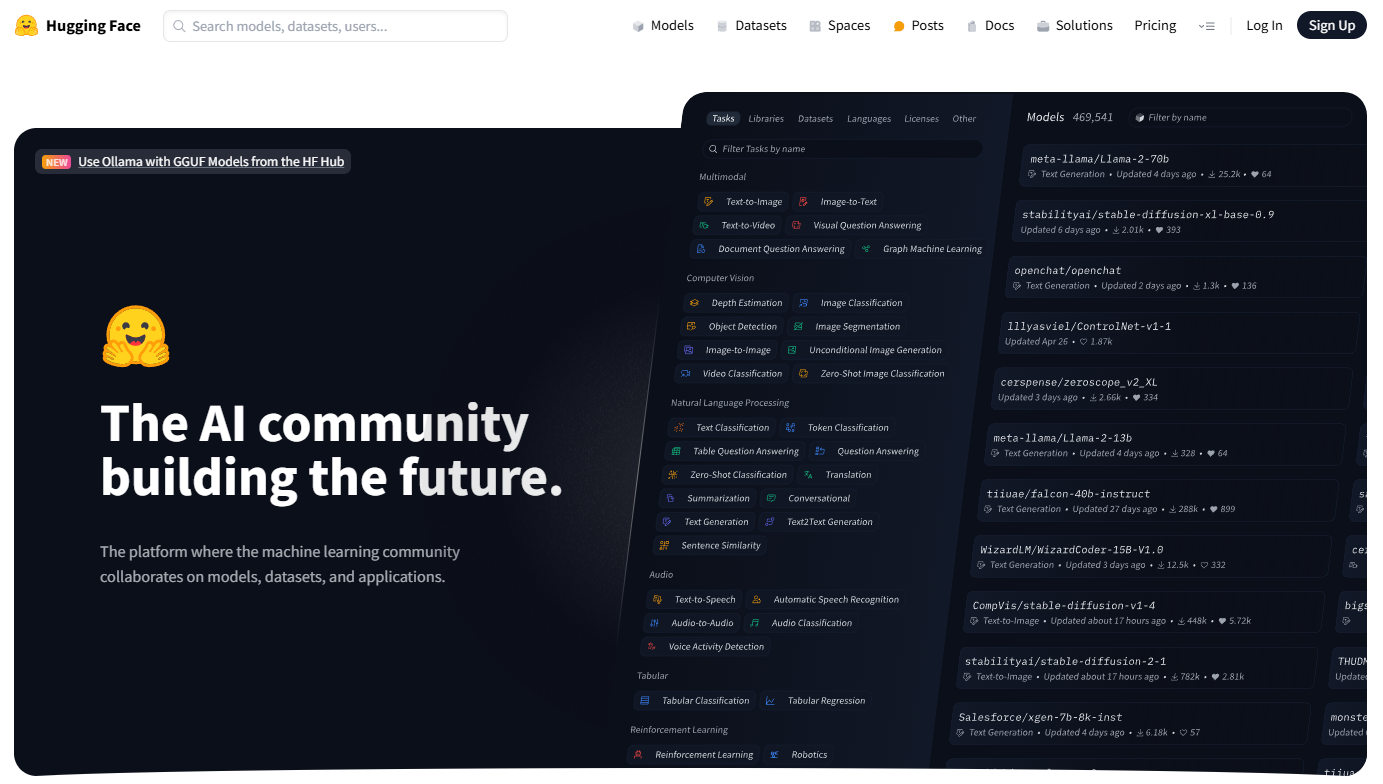

**Hugging Face** is a leading open-source community and library in the field of Natural Language Processing (NLP). It provides state-of-the-art tools that make it easy to build, train, and deploy NLP models. Hugging Face focuses on transformer architectures, which have revolutionized NLP by enabling models to capture long-range dependencies in text data.

https://huggingface.co/

### Why Hugging Face?

- **Access to Pre-trained Models**: Thousands of pre-trained models for tasks like text classification, translation, summarization, and more.
- **User-Friendly APIs**: Simplifies complex tasks with high-level APIs.
- **Community-Driven**: A large and active community contributes models, datasets, and resources.
- **Framework Compatibility**: Supports both PyTorch and TensorFlow.


### Hugging Face Datasets Library

The **Datasets** library offers an extensive collection of datasets ready for use.

#### Key Features

- **Extensive Dataset Collection**: Over 10,000 NLP datasets available.
- **Efficient Data Processing**: Memory-mapped and streaming datasets for efficient processing.
- **Data Transformation**: Built-in functions for preprocessing and augmenting data.


In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

# Load the IMDB dataset
dataset = load_dataset("imdb")

# Split the dataset
train_dataset = dataset['train']
test_dataset = dataset['test']

# Example usage
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")

### IMDB Dataset Overview

The **IMDB Movie Sentiment Analysis** dataset is structured as follows:
- **Training Set**: 25,000 labeled reviews
- **Test Set**: 25,000 labeled reviews
- **Labels**:
  - Positive: Reviews with a positive sentiment.
  - Negative: Reviews with a negative sentiment.

#### Example Reviews
- **Positive**: *"This movie was amazing! The acting was fantastic, and the plot was gripping."*
- **Negative**: *"I regret wasting my time on this movie. It was boring and predictable."*


In [ ]:
train_dataset, test_dataset

In [ ]:
# View a sample
sample = train_dataset[0]
print(f"Review Text:\n{sample['text']}\n")
print(f"Label: {sample['label']}")  # 0 for negative, 1 for positive


## Recurrent Neural Networks (RNNs)

In a recurrent neural network (RNN), the input object $X$ is a sequence. Consider a corpus of documents, like IMDb movie reviews. Each document is represented as a sequence of $L$ words:

$ X = \{X_1, X_2, \dots, X_L\} $

where each $X_l$ represents a word. The order and proximity of words convey semantic meaning. RNNs are designed to take advantage of this sequential nature, much like convolutional neural networks (CNNs) exploit the spatial structure of image data. The output $Y$ can also be a sequence (as in language translation) but is often a scalar, such as the binary sentiment label of a movie review.




### Structure of a Basic RNN

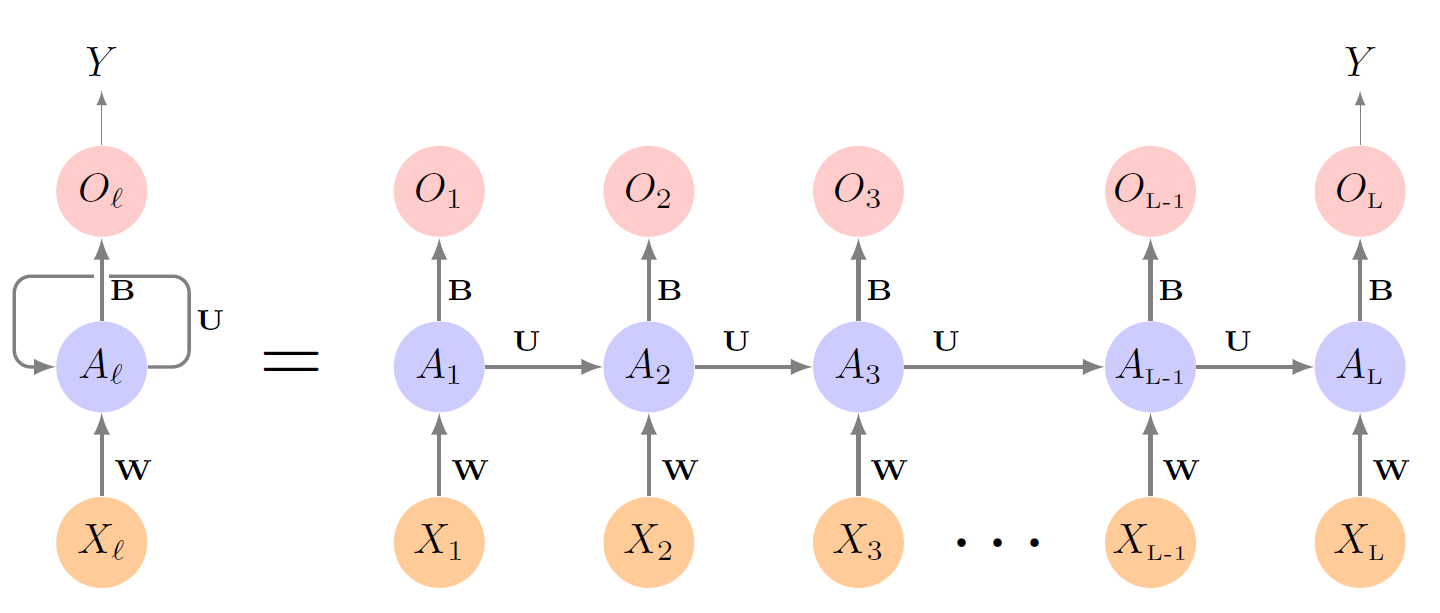

The figure illustrates a simple recurrent neural network (RNN). The input is a sequence of vectors: $\{X_l\}_{l=1}^L$ and the target output is a single response. The network processes the input sequence $X$ sequentially, where each $X_l$ is fed into the hidden layer. The hidden layer also receives input from the activation vector $A_{l-1}$ of the previous element in the sequence, producing the current activation vector $A_l$.

The same collections of weights $W$, $U$, and $B$ are reused as each element of the sequence is processed, demonstrating the weight-sharing mechanism inherent to RNNs. The output layer produces a sequence of predictions $\{O_l\}_{l=1}^L$ from the current activation $A_l$, though typically only the last prediction, $O_L$, is of primary interest.

On the left side of the schematic, a concise representation of the network is shown. This is "unrolled" on the right side, providing a more explicit depiction of each time step in the sequence.

---

A basic RNN structure includes an input sequence $X = \{X_1, X_2, \dots, X_L\}$, a hidden-layer sequence $\{A_l\}_{l=1}^L = \{A_1, A_2, \dots, A_L\}$, and a simple output $Y$. Each $X_l$ is a vector; in the document example, $X_l$ could represent a one-hot encoding of the $l$-th word based on the corpus vocabulary. As each $X_l$ is processed, the network updates hidden-layer activations $A_l$ based on $X_l$ and the activation $A_{l-1}$ from the previous step. Each $A_l$ contributes to an output prediction $O_l$ for $Y$, with the final output $O_L$ being most relevant.

Suppose each vector $X_l$ of the input sequence has $p$ components:

$ X_l^T = (X_{l1}, X_{l2}, \dots, X_{lp}) $

The hidden layer consists of $K$ units:

$ A_l^T = (A_{l1}, A_{l2}, \dots, A_{lK}) $

Let $W$ represent the $K \times (p+1)$ matrix of weights for the input layer, $U$ be a $K \times K$ matrix of weights for hidden-to-hidden layers, and $B$ be a $K + 1$ vector of weights for the output layer. Then:

$ A_{lk} = g \left( w_{k0} + \sum_{j=1}^p w_{kj} X_{lj} + \sum_{s=1}^K u_{ks} A_{l-1,s} \right) $

where $g(·)$ is an activation function, such as ReLU. The output $O_l$ is computed as:

$ O_l = \beta_0 + \sum_{k=1}^K \beta_k A_{lk} $

For a binary response, an additional sigmoid activation function can be applied. RNNs use weight sharing across time steps, meaning the weights $W$, $U$, and $B$ are reused at each step in the sequence, similar to filters in CNNs.

As the sequence progresses, hidden layer activations $A_l$ accumulate context from prior steps, making it possible to leverage this "learned context" for prediction.


In [ ]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Initialize RNN parameters
def initialize_rnn(p, K):
    """
    Initialize weights for an RNN.
    p: Number of input features
    K: Number of hidden units
    """
    W = np.random.randn(K, p + 1) * 0.01  # Input layer weights
    U = np.random.randn(K, K) * 0.01  # Hidden-to-hidden weights
    B = np.random.randn(K + 1) * 0.01  # Output weights (with bias term)
    return W, U, B

# Forward pass for a single RNN step
def rnn_step(X_l, A_prev, W, U, B, activation='relu'):
    """
    Compute the hidden state and output for a single time step.
    X_l: Input vector for time step l
    A_prev: Previous hidden state
    W, U, B: RNN weights
    activation: Activation function ('relu' or 'sigmoid')
    """
    # Add bias term to input
    X_l = np.append(1, X_l)  # Add bias (p+1 dimensions)

    # Compute hidden state
    A_l = np.dot(W, X_l) + np.dot(U, A_prev)
    if activation == 'relu':
        A_l = relu(A_l)
    elif activation == 'sigmoid':
        A_l = sigmoid(A_l)

    # Compute output
    O_l = np.dot(B[1:], A_l) + B[0]  # Linear output
    return A_l, O_l

# Process an input sequence
def rnn_forward(X, W, U, B, activation='relu'):
    """
    Perform a forward pass over a sequence.
    X: Input sequence of shape (L, p)
    W, U, B: RNN weights
    activation: Activation function ('relu' or 'sigmoid')
    """
    L, p = X.shape  # Length of sequence and number of features
    K = W.shape[0]  # Number of hidden units
    A = np.zeros((L, K))  # Store hidden states
    O = np.zeros(L)  # Store outputs

    # Initialize previous hidden state
    A_prev = np.zeros(K)

    # Process the sequence
    for l in range(L):
        A[l], O[l] = rnn_step(X[l], A_prev, W, U, B, activation)
        A_prev = A[l]  # Update hidden state for next step

    return A, O

In [ ]:
# Example usage
np.random.seed(42)

# Example parameters
p = 5  # Number of input features
K = 3  # Number of hidden units
L = 10  # Length of sequence

# Generate a random input sequence
X = np.random.rand(L, p)

# Initialize weights
W, U, B = initialize_rnn(p, K)

# Perform forward pass
hidden_states, outputs = rnn_forward(X, W, U, B, activation='relu')

# Display results
print("Input Sequence (X):")
print(X.shape,X)
print("Hidden States (A_l):")
print(hidden_states.shape, hidden_states)
print("\nOutputs (O_l):")
print(outputs.shape, outputs)

- **Define Activation Functions**: Supports both ReLU and sigmoid activation functions.
- **Weight Initialization**:
  - Randomly initializes weights for:
    - Input layer (W)
    - Hidden-to-hidden transitions (U)
    - Output layer (B)
- **Forward Pass**:
  - Processes each time step in the sequence.
  - Updates hidden states and generates outputs.
- **Reusable Functions**:
  - Each component of the RNN (e.g., a single time step or full sequence processing) is implemented in modular functions for easy reuse.


### Limitations of RNN: Long-Term Dependency Problem

### Problem
RNNs struggle to learn dependencies between the current input and inputs that occurred long ago in the sequence.

Consider a movie review where the negative sentiment is expressed in the first sentence.

#### Input Sequence:
$X = [\text{"The"}, \text{"movie"}, \text{"was"}, \text{"boring"}, \text{"."}, \text{"The"}, \text{"actors"}, \text{"tried"}, \text{"their"}, \text{"best"}, \text{"."}]$

- The word **"boring"** in the first sentence indicates a negative sentiment.
- While **"boring"** is reflected in the hidden state $A_4$, as more steps are processed and new information is added, the importance of **"boring"** diminishes in the hidden states.

### Result
If the final hidden state $A_{10}$ fails to retain the long-term dependency, the critical word **"boring"** may not influence the output $O_{10}$, leading to a failure in capturing the negative sentiment of the review.

---

## 2. Why Does This Problem Occur?

### (1) Vanishing Gradient Problem
- RNNs update parameters ($W$, $U$, $B$) through Backpropagation Through Time (BPTT).
- Since the hidden states are recursively multiplied, the gradient diminishes as the derivative of the activation function decreases.
- This results in a **vanishing gradient**, where older time steps contribute negligibly to the learning process, causing the model to rely mostly on recent information.

### (2) Fixed Parameters
- Using the same parameters ($W$ and $U$) across all time steps simplifies the model but limits its ability to represent complex dependencies.
- For example, in the case of a movie review where the first and last sentences are strongly connected, the fixed $W$ and $U$ cannot effectively capture this long-range dependency.

---

These limitations highlight why RNNs struggle with sequences requiring the preservation of long-term dependencies, motivating the development of advanced architectures like LSTMs and GRUs.


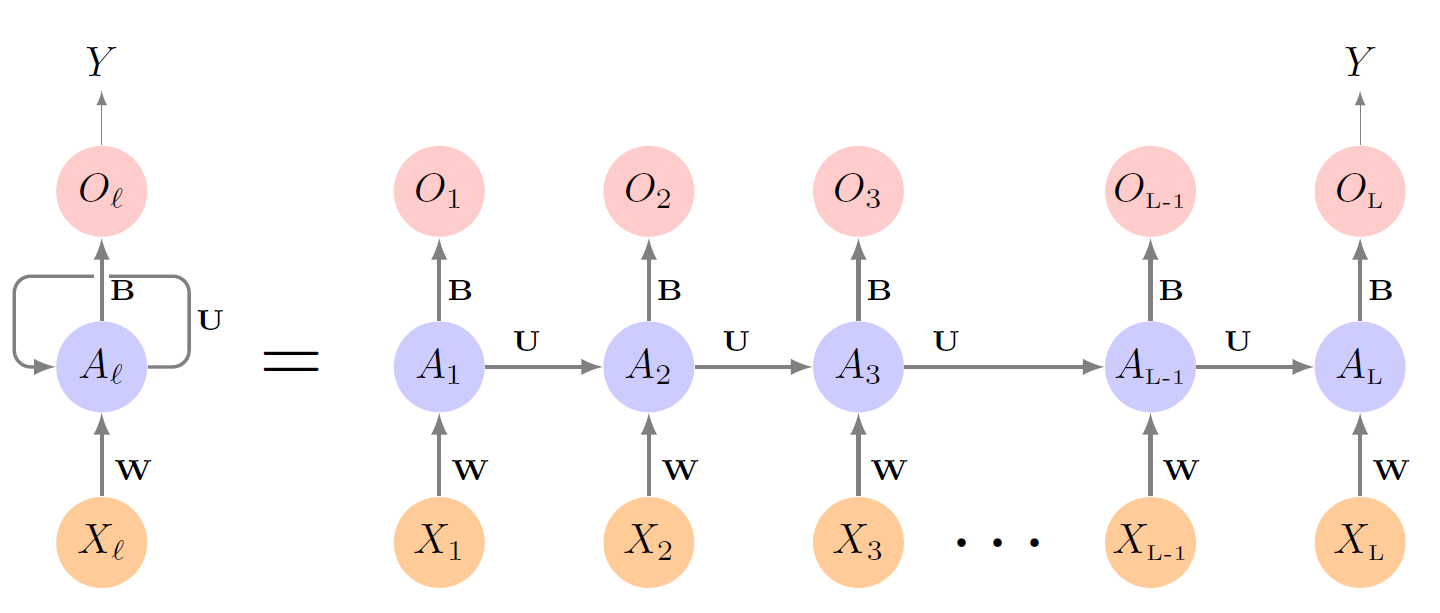


### Loss Function for Regression Problems

For a regression task with observation $(X, Y)$, the loss function is:

$ (Y - O_L)^2 $

where $O_L$ is the final output, given by:

$ O_L = \beta_0 + \sum_{k=1}^K \beta_k A_{Lk} $

Given $n$ input sequence/response pairs $(x_i, y_i)$, the parameters are learned by minimizing the sum of squared errors:

$ \sum_{i=1}^n (y_i - o_{iL})^2 = \sum_{i=1}^n \left( y_i - \left( \beta_0 + \sum_{k=1}^K \beta_k g \left( w_{k0} + \sum_{j=1}^p w_{kj} x_{iLj} + \sum_{s=1}^K u_{ks} a_{i,L-1,s} \right) \right) \right)^2 $

#### Intermediate Outputs in RNNs

Intermediate outputs $O_l$ provide evolving predictions for $Y$ across the sequence. While only the final output $O_L$ is typically used, intermediate outputs can be useful when the response is also a sequence, requiring the entire output sequence $\{O_1, O_2, \dots, O_L\}$.

#### Applications of RNNs

RNNs can be complex but are highly effective for various tasks, as illustrated in the following examples:

1. **Sentiment Analysis**: Processing words in IMDb movie reviews sequentially to predict sentiment.
2. **Financial Time Series Forecasting**: Using RNNs to forecast financial indices based on historical data.

---

### Sequential Models for Document Classification

Here we return to our classification task with IMDb reviews.When we used a bag-of-words model. Now, we aim to use the sequence of words in a document to predict its label.

**However, this approach presents a dimensionality challenge**: each word in our document is represented by a one-hot-encoded vector with 10,000 elements (one per word in the dictionary). A popular solution is to represent each word in a lower-dimensional embedding space, meaning instead of a binary vector with 9,999 zeros and a single one, each word is represented by a set of $m$ real numbers, typically none of which are zero. Here, $m$ is the embedding dimension, often in the low 100s or even less.



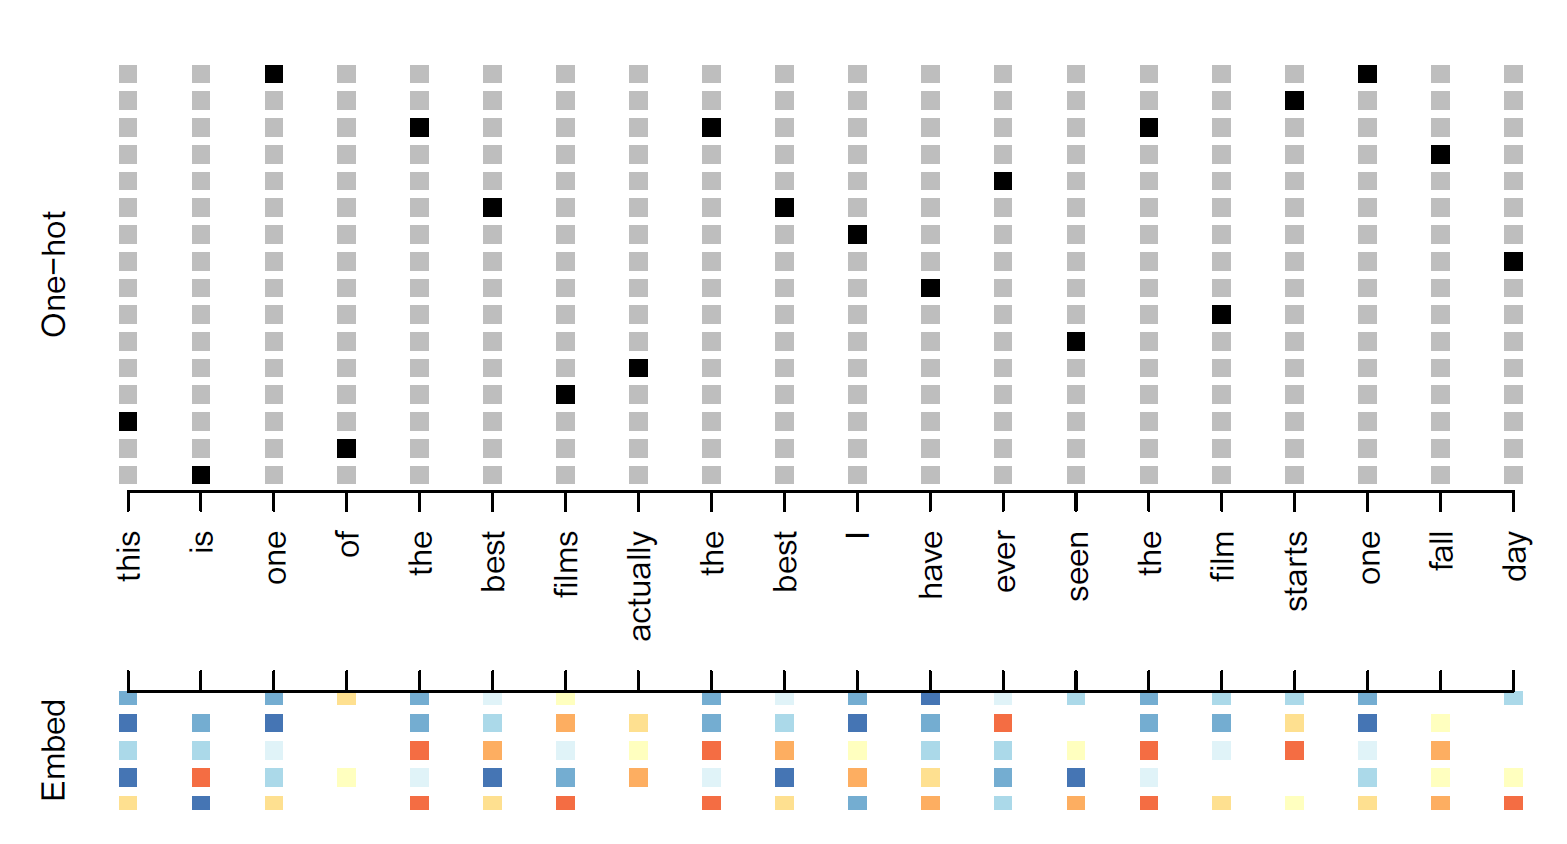

A sequence of 20 words representing a single document can be depicted as follows:

- **Top Panel**: One-hot encoding using a dictionary of 16 words. Each word is represented by a binary vector with a length of 16, where each vector has 15 zeros and a single one indicating the position of the word in the dictionary.
- **Bottom Panel**: Embedding in an $m$-dimensional space with $m = 5$. Here, each word is represented by a vector of real numbers with 5 components, mapping the words to a continuous embedding space, where similar words may appear closer together.
---


This requires a matrix $E$ of dimension $m \times 10,000$, where each column represents a word in our dictionary and contains its coordinates in the embedding space. Above figure illustrates this concept with a dictionary of 16 words and $m = 5$. The matrix $E$ can be learned directly by the neural network on a labeled document corpus (referred to as an embedding layer), or we can use a precomputed matrix $E$, a process called **weight freezing**. Two common pretrained embeddings are **word2vec** and **GloVe**, derived from a large document corpus by a method similar to principal components analysis. The goal is to position words in the embedding space such that words with similar meanings are close together.

After embedding, each document is represented as a sequence of $m$-vectors corresponding to the sequence of words. To standardize length, each document is limited to the last $L$ words, padding shorter documents with zeros. Thus, each document becomes a series of $L$ vectors $X = \{X_1, X_2, \dots, X_L\}$, with each $X_l$ having $m$ components.



Using the RNN structure, the training corpus consists of $n$ separate series (documents) of length $L$. Each document is processed sequentially, creating a parallel series of hidden activation vectors $\{A_l\}_{l=1}^L$. Each $A_l$ feeds into the output layer to produce the evolving prediction $O_l$, with the final value $O_L$ predicting the response (e.g., sentiment of the review).

This simple RNN structure has relatively few parameters. For $K$ hidden units, the common weight matrix $W$ has $K \times (m+1)$ parameters, matrix $U$ has $K \times K$ parameters, and $B$ has $2(K +1)$ parameters for two-class logistic regression. These are reused across the sequence $X = \{X_l\}_{l=1}^L$, similar to how a single convolution filter is applied to image patches.

If the embedding layer $E$ is learned, it adds $m \times D$ parameters (with $D = 10,000$ here), which is the largest cost. The RNN was trained on IMDb data with an embedding matrix $E$ of $m = 32$, learned during training, followed by a single recurrent layer with $K = 32$ hidden units. This model, trained with dropout regularization on 25,000 training reviews, achieved a 76% accuracy on the IMDb test set, with a GloVe-pretrained $E$ performing slightly worse.

---


### LSTM RNNs

For improved performance, more advanced RNNs use **long-term and short-term memory (LSTM)**, which maintains two tracks of hidden-layer activations. Each activation $A_l$ incorporates information from both earlier and more recent hidden units — an **LSTM RNN**. This helps address the issue of early signals being “washed out” as they propagate through the chain.

Refitting the model using an LSTM architecture improved IMDb test accuracy to 87%, close to the 88% achieved by the bag-of-words model. Despite its added complexity, this RNN is still relatively basic. Optimizing model size, regularization, and adding hidden layers could further improve results, though LSTM models are time-intensive to train, making exploration of many architectures tedious.

RNNs provide a powerful framework for sequential data modeling and continue to evolve rapidly, with ongoing advancements in architecture, data augmentation, and learning algorithms. As of early 2020, leading RNN configurations report IMDb accuracy above 95%, though details on these advanced models are beyond this book’s scope.

### Time Series Forecasting

### Historical Trading Statistics from the New York Stock Exchange

This dataset presents daily values of **normalized log trading volume**, **DJIA return**, and **log volatility** over a 24-year period from 1962 to 1986. The goal is to predict trading volume on any given day based on the historical data from all preceding days.

The data is split at January 2, 1980, marked by a red bar. Data to the left of this date serves as the training set, while data to the right serves as the test set.

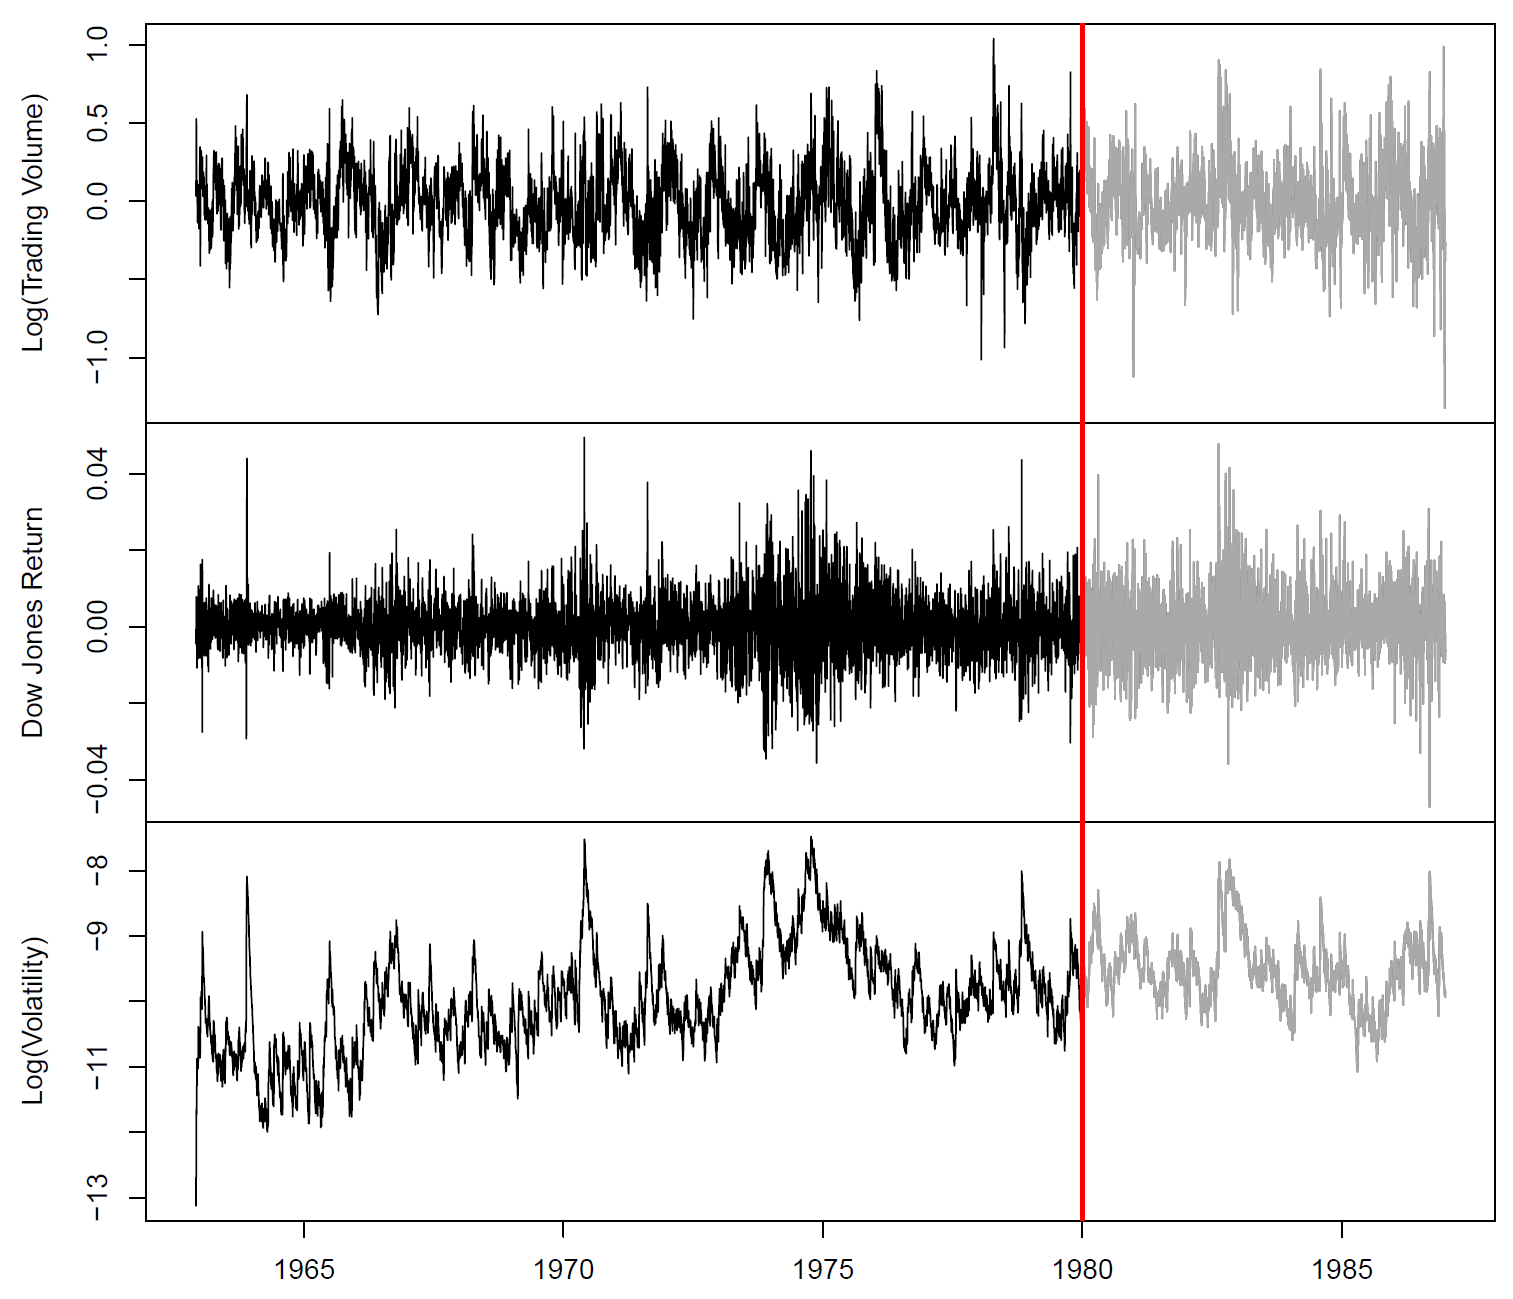

Above figure shows historical trading statistics from the New York Stock Exchange. It includes three daily time series covering the period from December 3, 1962, to December 31, 1986:

- **Log Trading Volume**: This is the fraction of all outstanding shares traded on a given day, relative to a 100-day moving average of past turnover, presented on a log scale.
- **Dow Jones Return**: This is the difference in the log of the Dow Jones Industrial Index between consecutive trading days.
- **Log Volatility**: This is calculated based on the absolute values of daily price movements.

---



Predicting stock prices is notoriously difficult, but forecasting trading volume based on recent history is more manageable and useful for planning trading strategies.

An observation here consists of the measurements $(v_t, r_t, z_t)$ on day $t$, corresponding to values for log trading volume, DJ return, and log volatility. There are a total of $T = 6,051$ such triples, each plotted as a time series in the figure. One immediate observation is that the day-to-day values are not independent of each other; these series exhibit **autocorrelation** — values nearby in time tend to be similar to each other. This distinguishes time series data from other types of datasets where observations are typically assumed to be independent.


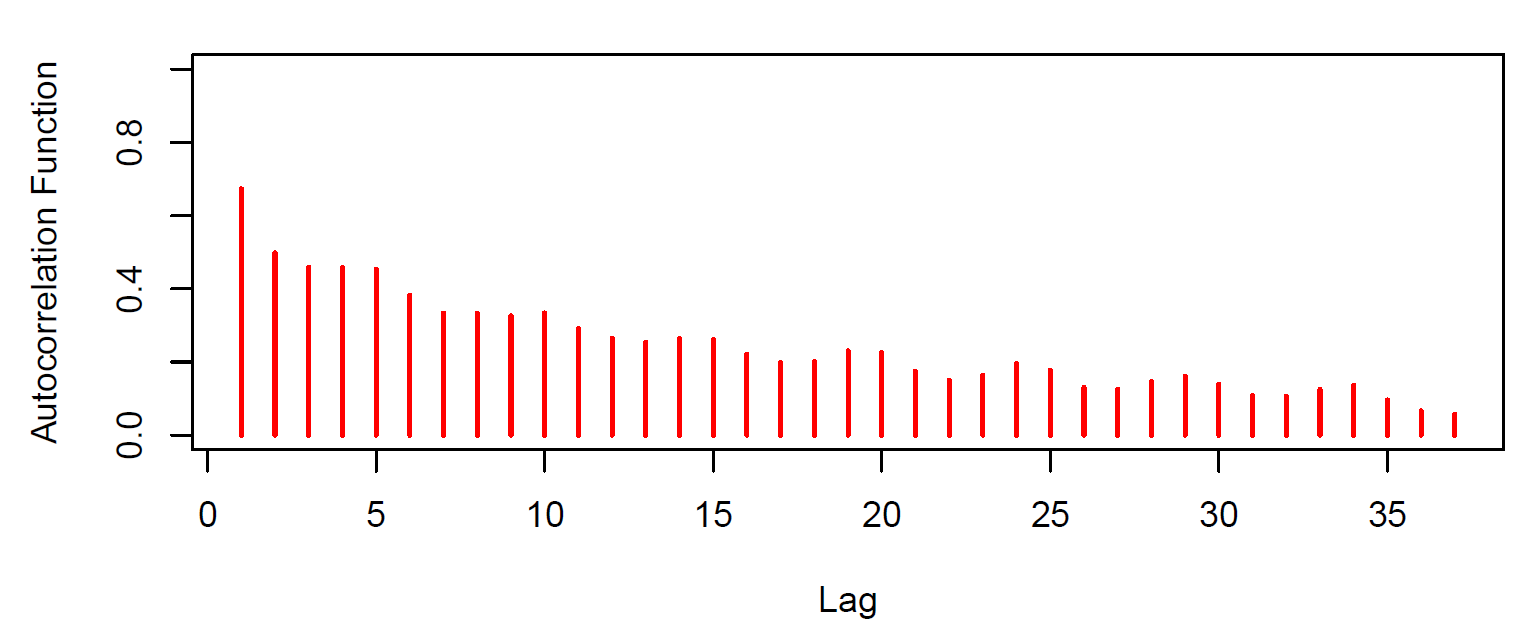

The autocorrelation function for **log_volume** reveals that nearby values are strongly correlated. We observe correlations above 0.2 for lags up to 20 days, indicating that recent values of log trading volume have a meaningful relationship with values in the near future.

---


To illustrate autocorrelation, consider pairs of observations $(v_t, v_{t-\tau})$, separated by a lag of $\tau$ days. By calculating the correlation coefficient for all such pairs in the $v_t$ series, we obtain the autocorrelation at lag $\tau$. Above figure shows the autocorrelation function for lags up to 37, revealing significant correlation over time.

An additional aspect of this forecasting problem is that the response variable, $v_t$ (log trading volume), also serves as a predictor. Specifically, we will use past values of log trading volume to predict future values.


### RNN Forecaster

We aim to predict a value $v_t$ based on past values $v_{t-1}, v_{t-2}, \dots$, and also incorporate past values of the other series $r_{t-1}, r_{t-2}, \dots$ and $z_{t-1}, z_{t-2}, \dots$. Although the dataset covers a long time series of 6,051 trading days, the structure of this forecasting problem differs from the document classification example:

- We only have a single series of data, unlike the 25,000 document examples.
- We have an entire series of target values $v_t$, with inputs that include past values of this same series.

How do we frame this problem in terms of the structure of RNN? We extract multiple short mini-series of input sequences $X = \{X_1, X_2, \dots, X_L\}$ of a predefined length $L$ (referred to as the lag), along with a corresponding target lag $Y$. The structure is as follows:

$
X_1 = \begin{pmatrix} v_{t-L} \\ r_{t-L} \\ z_{t-L} \end{pmatrix},
$
$
X_2 = \begin{pmatrix} v_{t-L+1} \\ r_{t-L+1} \\ z_{t-L+1} \end{pmatrix},
$
$
\dots, X_L = \begin{pmatrix} v_{t-1} \\ r_{t-1} \\ z_{t-1} \end{pmatrix}, $
$
Y = v_t.
$




Here, the target $Y$ is the value of **log_volume** $v_t$ at a single time point $t$, and the input sequence $X$ consists of a series of 3-vectors $\{X_l\}_{l=1}^L$, each containing the values **log_volume**, **DJ_return**, and **log_volatility** for days from $t - L$ up to $t - 1$. Each $t$ value forms a separate $(X, Y)$ pair, with $t$ ranging from $L + 1$ to $T$. For the NYSE data, we use the past five trading days to predict the next day’s trading volume, so $L = 5$. With $T = 6,051$, we can create 6,046 such $(X, Y)$ pairs. The choice of $L$ is a crucial parameter and should be carefully tuned, possibly using validation data.

We fit this model with $K = 12$ hidden units using the 4,281 training sequences derived from data before January 2, 1980 and used it to forecast the 1,770 values of **log_volume** after this date. This achieved an $R^2 = 0.42$ on the test data. For comparison, using yesterday’s value of **log_volume** as today’s prediction yields $R^2 = 0.18$.

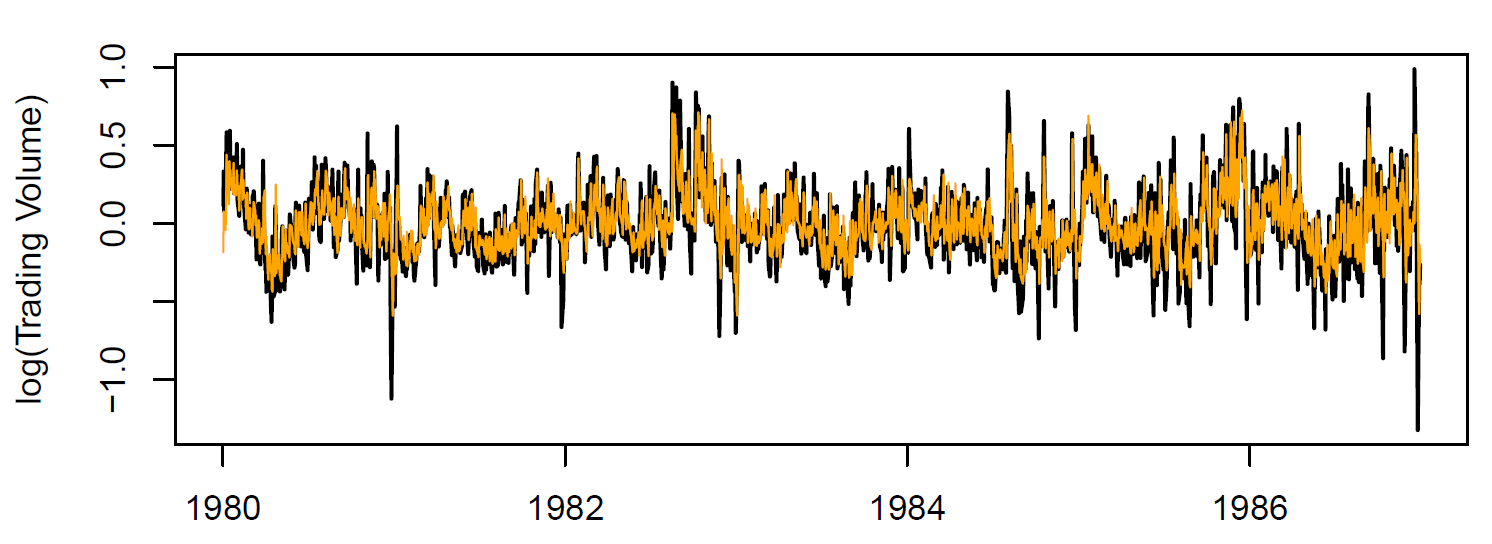

Figure shows the forecast results, with observed daily **log_volume** values for the test period 1980–1986 in black, and the predicted series in orange. The correspondence appears fairly accurate.

In forecasting **log_volume** during the test period, we use the test data itself to form the input sequences $X$. While this may seem like cheating, it is not; we are always using past data to predict future values.

---

### Autoregression

The RNN we just fit shares many similarities with a traditional **autoregression (AR)** linear model, which we present here for comparison. First, consider only the response sequence $v_t$. We construct a response vector $y$ and a matrix $M$ of predictors for least squares regression as follows:


<br>



$
y = \begin{pmatrix} v_{L+1} \\ v_{L+2} \\ v_{L+3} \\ \vdots \\ v_T \end{pmatrix}, \quad M = \begin{pmatrix} 1 & v_L & v_{L-1} & \dots & v_1 \\ 1 & v_{L+1} & v_L & \dots & v_2 \\ 1 & v_{L+2} & v_{L+1} & \dots & v_3 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & v_{T-1} & v_{T-2} & \dots & v_{T-L} \end{pmatrix}.
$


<br>


$M$ and $y$ each have $T - L$ rows, with each row representing an observation. We see that the predictors for any given response $v_t$ on day $t$ are the previous $L$ values of the same series. Fitting a regression of $y$ on $M$ corresponds to fitting the model


<br>

$
\hat{v}_t = \hat{\beta}_0 + \hat{\beta}_1 v_{t-1} + \hat{\beta}_2 v_{t-2} + \dots + \hat{\beta}_L v_{t-L},
$


<br>


and this is called an **order-$L$ autoregressive model**, or simply **AR($L$)**. For the NYSE data, we can include lagged versions of **DJ_return** and **log_volatility** ($r_t$ and $z_t$) in the predictor matrix $M$, giving a total of $3L + 1$ columns. An AR model with $L = 5$ achieves a test $R^2$ of 0.41, slightly below the 0.42 achieved by the RNN.

The RNN and AR models are similar in structure. Both use the same response $Y$ and input sequences $X$ of length $L = 5$ and dimension $p = 3$. The RNN processes this sequence from left to right with the same weights $W$ (for the input layer), while the AR model treats all $L$ elements of the sequence equally as a vector of $L \times p$ predictors — a process called **flattening** in the neural network literature.

However, the RNN includes hidden layer activations $A_l$ to transfer information along the sequence, introducing additional nonlinearity. With $K = 12$ hidden units, the RNN has $13 + 12 \times (1 + 3 + 12) = 205$ parameters, compared to only 16 for the AR(5) model.

### Parameters in an RNN

RNN parameters include:

- **Input-to-hidden weights**: Connect input features to hidden units.
- **Hidden-to-hidden weights**: Connect hidden units across time steps.
- **Hidden-to-Output**: Connect hiddten to Output.

##### Parameter Calculation

**Input-to-Hidden Weights ($W$):**
- For $p$ input features, $W$ includes $p+1$ columns (to account for bias).
- Total parameters: $K \times (p+1)$
- Substituting $K = 12$ and $p = 3$:
  $
  W = 12 \times (3+1) = 12 \times 4 = 48
  $

**Hidden-to-Hidden Weights ($U$):**
- Connects $K$ hidden units to each other, forming a $K \times K$ matrix.
- Total parameters: $K \times K$
- Substituting $K = 12$:
  $
  U = 12 \times 12 = 144
  $

**Hidden to Output ($B$):**
- A separate bias term is added for each hidden unit.
- Total parameters: $K + 1 = 13$

**Total Parameters**
Adding up the contributions from $W$, $U$, and $B$:

$
\text{Total Parameters} = W + U + B
$

Substituting the calculated values:

$
\text{Total Parameters} = 48 + 144 + 12 + 1 = 205
$

---

##### Comparison to AR(5) Model

The AR(5) model has only **16 parameters** because:

1. It directly models the relationship between the current value and the past 5 observations.
2. There are no hidden layers, leading to a simpler parameter count:
   - 5 coefficients for past observations.
   - 1 bias term.
   - Additional parameters for noise terms or adjustments, if needed.

---

- The RNN has **205 parameters** due to the additional hidden-to-hidden connections and the complexity introduced by the hidden layer.
- This contrasts with simpler models like AR(5), which have far fewer parameters but lack the flexibility of capturing nonlinear relationships.

## Practice RNN

### IMDb Sentiment Analysis

In [ ]:
!pip install datasets transformers

#### Train and Test Data

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from datasets import load_dataset

# Step 1: Load the IMDb dataset
dataset = load_dataset("imdb")
train_dataset = dataset['train']
test_dataset = dataset['test']

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")

#### Tokenizer

In [ ]:
from transformers import AutoTokenizer

# Tokenizer and Padding
# Using a tokenizer to process the text into token indices
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

A **tokenizer** converts text into a format suitable for machine learning models. Key functions include:

1. **Splitting Text into Tokens**: Breaks down text into smaller units (e.g., words, subwords, or characters).
2. **Mapping Tokens to Indices**: Assigns numerical indices to tokens based on a predefined vocabulary.
3. **Adding Special Tokens**: Includes tokens required by the model (e.g., `[CLS]` and `[SEP]` for BERT).
4. **Handling Sequence Lengths**: Pads or truncates sequences to a consistent size for batching.

---

The **AutoTokenizer** class from the Hugging Face Transformers library simplifies loading tokenizers for specific pre-trained models, such as BERT, GPT, or RoBERTa, using a model name or path.


When using "bert-base-uncased" with AutoTokenizer, it loads the tokenizer associated with the BERT-base model.

BERT uses a subword tokenization method called WordPiece. Words are broken into smaller units (subwords), allowing it to handle out-of-vocabulary (OOV) words.


1. WordPiece Tokenization:

  BERT uses a subword tokenization method called WordPiece. Words are broken into smaller units (subwords), allowing it to handle out-of-vocabulary (OOV) words.

2. Lowercasing:

  The "uncased" version of BERT converts all text to lowercase to simplify the vocabulary.

3. Special Tokens:

  Adds `[CLS]` (classification token) at the start and `[SEP]` (separator token) at the end of the input sequence.

In [ ]:
# Get the vocabulary
vocab = tokenizer.get_vocab()

# Display the first few items in the vocabulary
for token, idx in list(vocab.items())[:10]:
    print(f"Token: {token}, Index: {idx}")

In [ ]:
# Tokenize a sample text
text = "I love natural language processing!"
tokenized = tokenizer(text, padding="max_length", max_length=10, truncation=True, return_tensors = 'pt')

print("Tokenized Input:")
print(tokenized)

In [ ]:
for token in tokenized['input_ids'][0]:
    print(tokenizer.decode(token))

#### Key Parameters in Tokenizer

### 1. **Padding**
- Ensures all sequences have the same length by adding padding tokens.
- **Options**:
  - `"max_length"`: Pads sequences to the specified maximum length.
  - `"longest"`: Pads sequences to the length of the longest input in the batch.

### 2. **max_length**
- Truncates sequences that exceed this value.
- Ensures uniform input sizes for the model.

### 3. **Truncation**
- Truncates sequences longer than the specified `max_length`.
- Prevents excessively long inputs from being processed.

### 4. **return_tensors**
- Specifies the format of the tokenized output.
- **Options**:
  - `"pt"`: Returns PyTorch tensors.
  - `"tf"`: Returns TensorFlow tensors.

---

# Output Fields

### 1. **input_ids**
- Numerical indices representing tokens mapped from the vocabulary.

### 2. **attention_mask**
- Binary mask indicating the position of real tokens (1) and padding tokens (0).

### 3. **token_type_ids** (optional)
- Used in models like BERT to distinguish between segments in tasks requiring multiple inputs (e.g., question-answering).

---

#### Preparing IMDb Dataset for PyTorch DataLoader

**Step 1: Apply Preprocessing**


In [ ]:
# Function to tokenize and pad the text
def preprocess_data(sample):
    tokenized = tokenizer(
        sample['text'],
        max_length=256,  # Limit the sequence length
        padding="max_length",
        truncation=True,
        return_tensors = 'pt'
    )
    return {
        "input_ids": torch.tensor(tokenized['input_ids'], dtype=torch.long),
        "attention_mask": torch.tensor(tokenized['attention_mask'], dtype=torch.long),
        "label": torch.tensor(sample['label'], dtype=torch.long)
    }

# Apply preprocessing to datasets
train_data = train_dataset.map(preprocess_data)
test_data = test_dataset.map(preprocess_data)

- The map function applies the preprocess_data function to each example in the dataset.

**preprocess_data Function:**
  - Tokenizes text using a tokenizer (e.g., AutoTokenizer from Hugging Face).
  - Truncates and pads the sequences to a fixed length.
  - Converts text into input_ids and adds an attention_mask for token-level attention.
  - The processed output includes input_ids, attention_mask, and label.

---

In [ ]:
print(train_data[0]['input_ids'])
print(train_data[0]['attention_mask'])
print(train_data[0]['label'])

**Step 2: Create PyTorch Dataset Class**

In [ ]:
class IMDbDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.dataset[idx]["input_ids"], dtype=torch.long).squeeze(),
            "attention_mask": torch.tensor(self.dataset[idx]["attention_mask"], dtype=torch.long).squeeze(),
            "label": torch.tensor(self.dataset[idx]["label"], dtype=torch.long),
        }

In [ ]:
# Convert to PyTorch Datasets
train_dataset = IMDbDataset(train_data)
test_dataset = IMDbDataset(test_data)

# Step: DataLoader for Batching
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
train_loader

In [ ]:
# Get one batch of training data
data_iter = iter(train_loader)

In [ ]:
temp_data = next(data_iter)

In [ ]:
print(temp_data['input_ids'].shape)
print(temp_data['attention_mask'].shape)
print(temp_data['label'].shape)

#### Model

**Step: Define the Simple RNN Model**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

In [ ]:
# Step: Define the Simple RNN Model
import torch.nn as nn

class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(SimpleRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, input_ids):
        embedded = self.embedding(input_ids)
        output, hidden = self.rnn(embedded)
        return self.fc(hidden[-1])  # Use the last hidden state

In [ ]:
# Initialize the model
vocab_size = tokenizer.vocab_size
embedding_dim = 128
hidden_dim = 64
output_dim = 2  # Binary classification

# Initialize the model, loss, and optimizer
model = SimpleRNN(vocab_size, embedding_dim, hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
model

#### Model Training

**Step: Training Loop**

In [ ]:
device

In [ ]:
# Train the model
def train(model, train_loader, criterion, optimizer, epochs=30):
  for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch in train_loader:
        # Move input and labels to the device
        input_ids = batch["input_ids"].to(device)
        labels = batch["label"].to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(input_ids)  # (batch_size, output_dim)

        # Compute loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Track metrics
        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)  # Get predicted class
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    # Print epoch results
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluate the model
def evaluate(model, test_loader):
    # Step : Evaluate the Model
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].to(device)
            labels = batch["label"].to(device)
            outputs = model(input_ids)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    print(f"Test Accuracy: {correct/total:.4f}")
    return correct/total

# Run training and evaluation
train(model, train_loader, criterion, optimizer, epochs=20)
evaluate(model, test_loader)

In [ ]:
evaluate(model, test_loader)

#### Model Save and Load

In [ ]:
# Save the model's state_dict
torch.save(model.state_dict(), "simple_rnn.pth")
print("Model saved successfully.")

In [ ]:
# Create a new instance of the model
loaded_model = SimpleRNN(vocab_size, embedding_dim, hidden_dim, output_dim).to(device)

# Load the saved model state
loaded_model.load_state_dict(torch.load("simple_rnn.pth"))
print("Model loaded successfully.")

#### Prediction

In [ ]:
loaded_model.eval()

In [ ]:
# Select 20 random texts from the test set
test_texts = []
test_labels = []
pred_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        labels = batch["label"].to(device)
        outputs = model(input_ids)
        preds = torch.argmax(outputs, dim=1)

        for i in range(len(input_ids)):
          test_texts.append(input_ids[i])
          test_labels.append(labels[i].item())
          pred_labels.append(preds[i].item())

          if len(test_texts) >= 20:
            break
        if len(test_texts) >= 20:
            break

In [ ]:
dataset['test'][0]

In [ ]:
print([tokenizer.decode(token) for token in test_texts[0]])

In [ ]:
print(test_labels[0])
print(pred_labels[0])

In [ ]:
del model
del optimizer
torch.cuda.empty_cache()

#### Model Improving

##### Validation Set

In [ ]:
val_ratio = 0.2  # 20% of the reduced training set will be used for validation
train_size = int((1 - val_ratio) * len(train_dataset))
val_size = len(train_dataset) - train_size

train_dataset_final, val_set_final = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset_final, batch_size=batch_size)
val_loader = DataLoader(val_set_final, batch_size=batch_size)

# Initialize the model
vocab_size = tokenizer.vocab_size
embedding_dim = 128
hidden_dim = 64
output_dim = 2  # Binary classification

# Initialize the model, loss, and optimizer
model = SimpleRNN(vocab_size, embedding_dim, hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

# Define the EarlyStopping class
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False
        self.best_model = None

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.best_model = model.state_dict()
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# Define the validation function
def validate(model, val_loader, criterion):
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            # Move input and labels to the device
            input_ids = batch["input_ids"].to(device)
            labels = batch["label"].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    return avg_val_loss


# Train the model
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, early_stopping, epochs=30):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for batch in train_loader:
            # Move input and labels to the device
            input_ids = batch["input_ids"].to(device)
            labels = batch["label"].to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(input_ids)

            # Compute loss
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Track metrics
            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        # Calculate training metrics
        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        train_accuracy = correct / total

        # Validate the model
        avg_val_loss = validate(model, val_loader, criterion)
        val_losses.append(avg_val_loss)

        # Step the scheduler
        scheduler.step(avg_val_loss)

        print(f"Epoch [{epoch+1}/{epochs}]")
        print(f"Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

        # Check for early stopping
        early_stopping(avg_val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break

    # Load the best model's weights after early stopping
    model.load_state_dict(early_stopping.best_model)

    # Plot the validation and training losses
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss")
    plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss", linestyle="--")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()


from torch.optim.lr_scheduler import ReduceLROnPlateau

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
early_stopping = EarlyStopping(patience=5, min_delta=0.001)

# Train the model with early stopping and learning rate scheduler
train(model, train_loader, val_loader, criterion, optimizer, scheduler, early_stopping, epochs=50)

In [ ]:
evaluate(model, test_loader)

In [ ]:
# Save the model's state_dict
torch.save(model.state_dict(), "simple_rnn_earlystopping.pth")
print("Model saved successfully.")

In [ ]:
# Create a new instance of the model
loaded_model = SimpleRNN(vocab_size, embedding_dim, hidden_dim, output_dim).to(device)

# Load the saved model state
loaded_model.load_state_dict(torch.load("simple_rnn_earlystopping.pth"))
print("Model loaded successfully.")

In [ ]:
del model
del optimizer
torch.cuda.empty_cache()

##### Adding Multiple RNN Layers

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MultiLayerRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers):
        super(MultiLayerRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True)  # Multi-layer RNN
        self.fc = nn.Linear(hidden_dim, output_dim)  # Fully connected layer
        self.activation = nn.ReLU()  # Activation function (ReLU for non-linearity)

    def forward(self, input_ids):
        embedded = self.embedding(input_ids)  # Convert input indices to embeddings
        output, hidden = self.rnn(embedded)  # RNN forward pass
        logits = self.fc(hidden[-1])  # Fully connected layer on the last hidden state
        return self.activation(logits)  # Apply activation function


In [ ]:
train_loader = DataLoader(train_dataset_final, batch_size=batch_size)
val_loader = DataLoader(val_set_final, batch_size=batch_size)

vocab_size = tokenizer.vocab_size
embedding_dim = 128
hidden_dim = 64
output_dim = 2  # Binary classification

model = MultiLayerRNN(vocab_size, embedding_dim, hidden_dim, output_dim, 2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
early_stopping = EarlyStopping(patience=5, min_delta=0.0001)

train(model, train_loader, val_loader, criterion, optimizer, scheduler, early_stopping, epochs=50)

In [ ]:
evaluate(model, test_loader)

In [ ]:
torch.save(model.state_dict(), "MultiLayerRNN.pth")
print("Model saved successfully.")

In [ ]:
loaded_model = MultiLayerRNN(vocab_size, embedding_dim, hidden_dim, output_dim, 2).to(device)
loaded_model.load_state_dict(torch.load("MultiLayerRNN.pth"))
print("Model loaded successfully.")

In [ ]:
del model
del optimizer
torch.cuda.empty_cache()

###### Comparison: **SimpleRNN** vs **MultiLayerRNN**

---

## **1. Architectural Differences**

| **Aspect**               | **SimpleRNN**                              | **MultiLayerRNN**                          |
|--------------------------|--------------------------------------------|-------------------------------------------|
| **Layers**               | Single RNN layer                          | Multiple stacked RNN layers               |
| **Activation Function**  | No explicit activation function           | Includes ReLU activation for non-linearity |
| **Flexibility**          | Simpler structure with limited depth      | Greater flexibility and capacity          |

---

## **2. Advantages**

### **Advantages of SimpleRNN**
1. **Ease of Implementation**:
   - Fewer components make it easier to implement and debug.
   - Computationally faster for training and inference due to fewer parameters.
2. **Suitable for Small Datasets**:
   - Reduces the risk of overfitting on smaller datasets.
3. **Lightweight**:
   - Requires less memory and computational resources.

### **Advantages of MultiLayerRNN**
1. **Enhanced Learning Capacity**:
   - Stacked layers allow the model to learn more complex temporal patterns and dependencies.
2. **Non-linearity**:
   - The addition of a ReLU activation function helps the model capture non-linear relationships in data.
3. **Flexibility**:
   - Can adjust the number of layers (`num_layers`) to balance model capacity and computational cost.

---

## **3. Disadvantages**

### **Disadvantages of SimpleRNN**
1. **Limited Learning Capacity**:
   - A single layer may struggle to capture complex patterns or long-term dependencies in data.
2. **Linear Output**:
   - Without an activation function, the output lacks non-linearity, which can limit performance in more complex tasks.

### **Disadvantages of MultiLayerRNN**
1. **Risk of Overfitting**:
   - Additional layers and parameters increase the likelihood of overfitting, especially on small datasets.
2. **Increased Computational Cost**:
   - Training is slower due to the higher number of parameters in multiple layers.
3. **Vanishing Gradient Problem**:
   - Standard RNN layers without specialized units (e.g., LSTM or GRU) can still suffer from vanishing gradients, particularly with deep architectures.

---

## **4. When to Use Each Model**

| **Scenario**                             | **Recommended Model** |
|------------------------------------------|-----------------------|
| **Simple patterns or small datasets**    | SimpleRNN             |
| **Complex patterns or larger datasets**  | MultiLayerRNN         |
| **Limited computational resources**      | SimpleRNN             |
| **Ability to capture non-linearities**   | MultiLayerRNN         |

---

## **5. Summary**

| **Model**         | **Strength**                           | **Weakness**                                 |
|-------------------|---------------------------------------|---------------------------------------------|
| **SimpleRNN**     | Lightweight, fast, simple structure   | Limited learning capacity, lacks non-linearity |
| **MultiLayerRNN** | More capacity, flexibility, non-linear | Risk of overfitting, computationally heavier |

---

## **Conclusion**
- Use **SimpleRNN** for lightweight, simpler tasks.
- Use **MultiLayerRNN** for tasks requiring greater complexity and deeper learning capacity, but be mindful of overfitting and computational cost.


##### LSTM (Long Short-Term Memory)

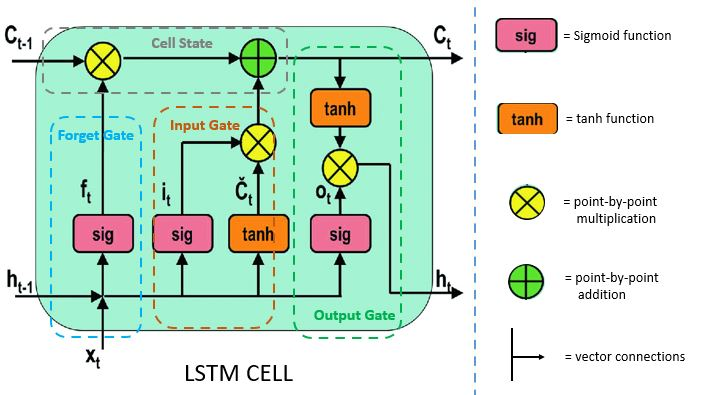

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture specifically designed to address the limitations of traditional RNNs, particularly the vanishing gradient problem. It is capable of learning long-term dependencies in sequential data through the use of specialized gating mechanisms.

---

###### **Key Components**
1. **Memory Cell**:
   - Stores information over time, enabling the model to retain long-term dependencies.

2. **Gating Mechanisms**:
   - **Forget Gate**:
     Decides what information to discard from the cell state.
   - **Input Gate**:
     Determines which new information to add to the cell state.
   - **Output Gate**:
     Controls what part of the cell state should be output at each step.

3. **Cell State**:
   - A pathway that runs through the entire sequence, modified by gates to retain important information.

---

## **How Does it Work?**

1. **Forget Gate**:
   - Formula: $f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)$
   - Determines what portion of the previous cell state ($C_{t-1}$) should be forgotten.

2. **Input Gate**:
   - Formula: $i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)$  
   - $ \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)$
   - Controls what new information will be stored in the memory cell.

3. **Update Cell State**:
   - Formula: $C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t$
   - Combines the forget and input gates to update the memory.

4. **Output Gate**:
   - Formula: $o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)$  
     $h_t = o_t \cdot \tanh(C_t)$
   - Determines the final output and hidden state of the cell.

---

## **Advantages**
1. **Long-Term Dependencies**:
   - Efficiently models relationships over long sequences.
2. **Handles Vanishing Gradient Problem**:
   - Gating mechanisms ensure gradients do not diminish during backpropagation.
3. **Flexibility**:
   - Performs well on tasks involving variable-length sequences.
4. **Widely Applicable**:
   - Used in diverse areas like language modeling, speech recognition, and time-series forecasting.

---

## **Disadvantages**
1. **Computationally Expensive**:
   - Requires more resources than simpler RNNs due to additional gates and parameters.
2. **Risk of Overfitting**:
   - Higher parameter count increases the likelihood of overfitting, especially on small datasets.
3. **Training Complexity**:
   - Slower training due to the complexity of operations.

---

## **Applications**
1. **Natural Language Processing**:
   - Machine translation, text generation, and sentiment analysis.
2. **Speech Recognition**:
   - Recognizing and processing audio sequences.
3. **Time-Series Forecasting**:
   - Predicting stock prices, weather, and other sequential patterns.

---

## **Summary**

| **Aspect**           | **LSTM Characteristics**                                         |
|----------------------|------------------------------------------------------------------|
| **Core Idea**        | Stores and processes information over long sequences            |
| **Key Feature**      | Gating mechanisms (Forget, Input, Output)                       |
| **Strengths**        | Handles long-term dependencies, mitigates vanishing gradients   |
| **Weaknesses**       | Computational cost, risk of overfitting                        |
| **Best Use Case**    | Complex sequential tasks with long-range dependencies           |

LSTMs provide a robust solution for modeling complex sequential data and have become a cornerstone in modern deep learning tasks.

In [ ]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, input_ids):
        embedded = self.embedding(input_ids)
        output, (hidden, cell) = self.lstm(embedded)
        return self.fc(hidden[-1])

In [ ]:
train_loader = DataLoader(train_dataset_final, batch_size=batch_size)
val_loader = DataLoader(val_set_final, batch_size=batch_size)

vocab_size = tokenizer.vocab_size
embedding_dim = 128
hidden_dim = 64
output_dim = 2  # Binary classification

model = LSTM(vocab_size, embedding_dim, hidden_dim, output_dim).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
early_stopping = EarlyStopping(patience=5, min_delta=0.001)

train(model, train_loader, val_loader, criterion, optimizer, scheduler, early_stopping, epochs=50)

In [ ]:
 evaluate(model, test_loader)

In [ ]:
torch.save(model.state_dict(), "LSTM.pth")
print("Model saved successfully.")

In [ ]:
loaded_model = LSTM(vocab_size, embedding_dim, hidden_dim, output_dim).to(device)
loaded_model.load_state_dict(torch.load("LSTM.pth"))
print("Model loaded successfully.")

In [ ]:
del model
del optimizer
torch.cuda.empty_cache()

##### GRU (Gated Recurrent Unit)


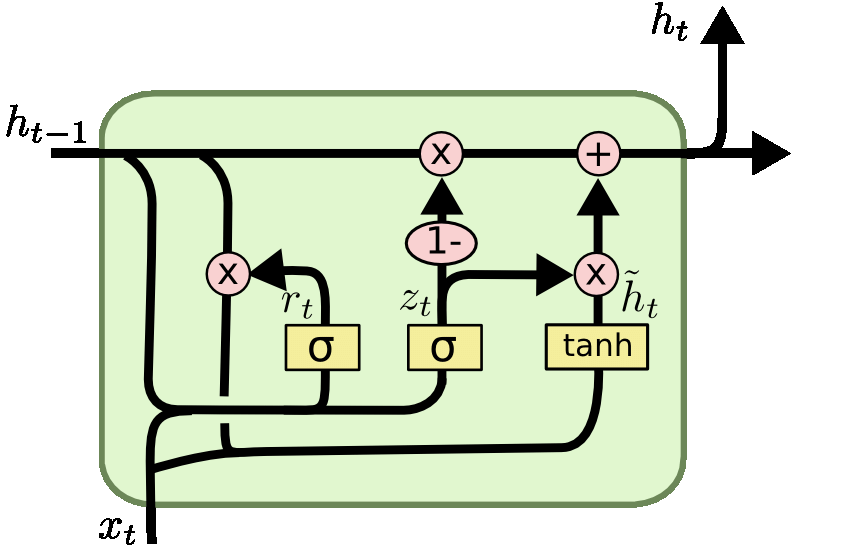

Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) that simplifies the architecture of LSTMs while retaining the ability to model long-term dependencies in sequential data. GRU achieves this by combining the forget and input gates into a single update gate and introducing a reset gate.

---

###### Key Components

### **Update Gate**
- Determines how much of the previous information to retain and how much of the new information to incorporate.
- **Formula**:  
  $z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b_z)$

### **Reset Gate**
- Controls how much of the previous hidden state to forget.
- **Formula**:  
  $r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r)$

### **Candidate Hidden State**
- Proposes a new memory content based on the reset hidden state and current input.
- **Formula**:  
  $\tilde{h}_t = \tanh(W_h \cdot [r_t \cdot h_{t-1}, x_t] + b_h)$

### **Final Hidden State**
- Combines the candidate hidden state and the previous hidden state using the update gate.
- **Formula**:  
  $h_t = (1 - z_t) \cdot h_{t-1} + z_t \cdot \tilde{h}_t$

---

## Advantages

- **Simpler Architecture**:  
  Fewer gates compared to LSTM, making GRU computationally less expensive.
- **Efficiency**:  
  Performs well on smaller datasets or in cases where computational resources are limited.
- **Handles Long-Term Dependencies**:  
  Retains the ability to model long-range relationships in sequential data.

---

## Disadvantages

- **Less Expressive**:  
  The simpler structure might underperform compared to LSTMs in tasks requiring very complex dependencies.
- **No Cell State**:  
  Unlike LSTM, GRU does not explicitly maintain a separate cell state, which might limit flexibility in certain cases.

---

## Summary Table

| **Aspect**           | **GRU Characteristics**                                         |
|-----------------------|-----------------------------------------------------------------|
| **Core Idea**         | Simplified version of LSTM with fewer gates                    |
| **Key Feature**       | Update and reset gates                                         |
| **Strengths**         | Simpler, faster, requires fewer resources                      |
| **Weaknesses**        | May lack flexibility compared to LSTM                          |
| **Best Use Case**     | When computational efficiency is critical or datasets are small |

---

GRUs are an excellent choice for sequential tasks where simplicity and efficiency are essential.


In [ ]:
import torch
import torch.nn as nn

class GRU(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(GRU, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Embedding layer
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)  # Multi-layer GRU
        self.fc = nn.Linear(hidden_dim, output_dim)  # Fully connected layer

    def forward(self, input_ids):
        embedded = self.embedding(input_ids)  # Convert input indices to embeddings
        output, hidden = self.gru(embedded)  # GRU forward pass
        return self.fc(hidden[-1])

In [ ]:
train_loader = DataLoader(train_dataset_final, batch_size=batch_size)
val_loader = DataLoader(val_set_final, batch_size=batch_size)

vocab_size = tokenizer.vocab_size
embedding_dim = 128
hidden_dim = 64
output_dim = 2  # Binary classification

model = GRU(vocab_size, embedding_dim, hidden_dim, output_dim).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
early_stopping = EarlyStopping(patience=5, min_delta=0.001)

train(model, train_loader, val_loader, criterion, optimizer, scheduler, early_stopping, epochs=50)

In [ ]:
 evaluate(model, test_loader)

In [ ]:
torch.save(model.state_dict(), "GRU.pth")
print("Model saved successfully.")

In [ ]:
loaded_model = GRU(vocab_size, embedding_dim, hidden_dim, output_dim).to(device)
loaded_model.load_state_dict(torch.load("GRU.pth"))
print("Model loaded successfully.")

In [ ]:
del model
del optimizer
torch.cuda.empty_cache()